<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/HW1_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data


In [2]:
from keras.datasets import mnist

(X_train_original, y_train_original), (X_test_original, y_test_original) = mnist.load_data()

Using TensorFlow backend.


In [0]:
X_train = X_train_original.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = X_test_original.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255

In [0]:
y_train, y_test = y_train_original.reshape(60000,1),y_test_original.reshape(10000,1)



## lucky number 7:

 classifer for number 7.  Anything except 7 is Zero and If y == 7 we have output of 1



In [0]:
y1_train = np.zeros(y_train.shape)
y1_train[np.where(y_train == 7.0)[0]] = 1
y_train = y1_train

y1_test = np.zeros(y_test.shape)
y1_test[np.where(y_test == 7.0)[0]] = 1
y_test = y1_test


Now that we have input and output ready

Lets start building the first layer

##Logistic regression with binary cross entropy loss..

1.   Weights
2.   Bias
3. Activation
4. Input X   
n = Number of Features which is 784   
m = Number of samples which in training set is 60000


In [0]:

np.random.seed(47)
W = np.zeros((X_train.shape[1], 1))


In [7]:
W.shape

(784, 1)

In [8]:
b = np.zeros((1,1))
b.shape

(1, 1)

In [0]:
def Sigmoid(z):
    arg1 = 1 / (1 + np.exp(-z))
    return arg1


## Binary Cross Entropy (CRS) class:

---



In [0]:
class CRS:
  
  #class constructor
  #In order to save W for other methods such as prediction
  def __init__(self,W,b):
    self.W = np.zeros((X_train.shape[1],1))
    self.b = np.zeros((1,1))
  
    #Derivative of Loss 
  def derCRSLoss(self,A,y):
    arg1 = (-y/A) + ((1-y)/(1-A))
    return arg1
  
    #Derivative of Sigmoid method  
  def derSigmoid(self,A):
      arg1 = A*(1-A)
      return arg1
    
    #Cross Error method   
  def CRSLoss(self,A,y):
      arg1 = (np.log(A)*(-y)-np.log(1-A)*(1-y)).mean()
      return arg1
    #Training weights and Biases
  def train(self, X, y,lr=0.01 , batch=128 , epochs = 1):
    m=60000


    history={"Loss":[]}

    for i in range(epochs):
      object_Loss = []
      for e in range(0,m,batch):
        X1= X[e:e+batch]
        y1= y[e:e+batch]
        Z= X1.dot(self.W)+self.b
        # Activation function
        A1 = Sigmoid(Z)
        # Loss update
        Gradient= self.derCRSLoss(A1,y1)*(self.derSigmoid(A1))
        # Updating the weights
        self.W= self.W - lr * np.dot(Gradient.T , X1).T/batch
        # Updating the bias
        self.b= self.b- lr*Gradient.mean()
        object_Loss += [self.CRSLoss(A1,y1)]
      history['Loss'] += [np.mean(object_Loss)]
      print(" Loss: {}\n".format(history['Loss'][-1]))
    print("Test accuracy : {} %".format(100 - np.mean(np.abs(network.predict(X_test) - y_test))*100))  
    return history
    
  
  def predict(self,X):
        m = X.shape[0]
        #creating a prediction vector
        Z= X.dot(self.W)+self.b
        A = Sigmoid(Z)
        y_prediction = np.zeros((1,m))
        for i in range(A.shape[0]):
          if( A[i]>= 0.5):
            y_prediction[0,i] = 1
          else:
            y_prediction[0,i] = 0
        return y_prediction
    


###The results shown for the detection of Digit 7:

In [0]:
network = CRS(None,None)

In [25]:
results = network.train(X_train, y_train)

 Loss: 0.2667081522465774

Test accuracy : 89.335296 %


###Visualization:

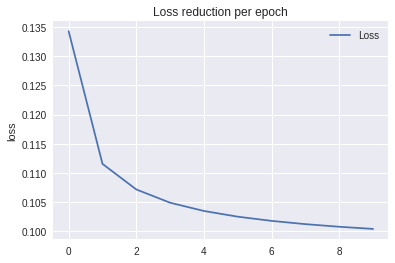

In [22]:
plt.figure(1)
plt.plot(results['Loss'], label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()


##Loop for classification of all numbers


In [0]:
numbers = np.arange(10)
networks = []
history = []


Reseting the labels

In [27]:

for i in numbers:
    print("______________________________________")
    print("Training Classifier for the Number: {} ".format(i))
    y2_train = np.zeros(y_train_original.shape)
    y2_train[np.where(y_train_original == i)[0]] = 1
    y_train = y2_train
    y_train = y_train.reshape(60000,1)
    networks += [CRS(None,None)]
    history += [networks[-1].train(X_train, y_train)]
    
    y2_test = np.zeros(y_test_original.shape)
    y2_test[np.where(y_test_original == i)[0]] = 1
    y_test = y2_test
    y_test = y_test.reshape(10000,1)



______________________________________
Training Classifier for the Number: 0 
 Loss: 0.1810837687420281

Test accuracy : 89.335296 %
______________________________________
Training Classifier for the Number: 1 
 Loss: 0.16399466774538293

Test accuracy : 89.62112 %
______________________________________
Training Classifier for the Number: 2 
 Loss: 0.24287696273352785

Test accuracy : 88.09344 %
______________________________________
Training Classifier for the Number: 3 
 Loss: 0.2460714902271943

Test accuracy : 89.108608 %
______________________________________
Training Classifier for the Number: 4 
 Loss: 0.22456899577765638

Test accuracy : 89.32544 %
______________________________________
Training Classifier for the Number: 5 
 Loss: 0.25627684079321333

Test accuracy : 89.601408 %
______________________________________
Training Classifier for the Number: 6 
 Loss: 0.210556421636048

Test accuracy : 90.488448 %
______________________________________
Training Classifier for the Nu